


from IPython.display import Image
Image(r"\Users\DELL\Desktop\face-mask-detection-keras-master\images\dataset.png")

# Data Preprocessing
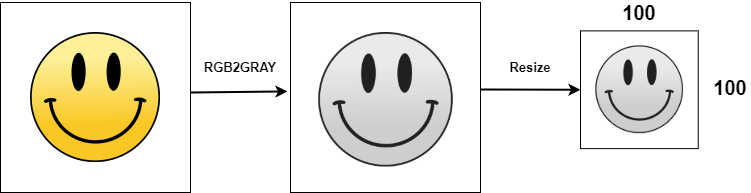

In [ ]:
import os

# with_mask list of name of files or images in data set folder 
with_mask = []

image_path = r'/content/drive/My Drive/Colab Notebooks/with_mask'
for image in os.walk(image_path):
    with_mask.append(image[2]) 
    


# without mask list of name of files or images in data set folder 
without_mask = []

image_path = r'/content/drive/My Drive/Colab Notebooks/without_mask'
for image in os.walk(image_path):
    without_mask.append(image[2]) 
    
    
#Data preprocessing

import numpy as np

with_mask = np.array(with_mask)
without_mask = np.array(without_mask)
without_mask = np.reshape(without_mask,-1)
with_mask = np.reshape(with_mask,-1)
withmask=[]

for i in with_mask:
    try: 
        arr= cv2.imread(image_path + '/' + i)
        arr = cv2.resize(arr,(100,100))                 #resize images to 100*100 pixels
        gray = cv2.cvtColor(arr,cv2.COLOR_BGR2GRAY)     #convvert into gray image
        withmask.append(gray)
    except:
        pass
    
withoutmask=[]

for i in without_mask:
    try:
      arr= cv2.imread(image_path + '/' + i)
      arr = cv2.resize(arr,(100,100))
      gray = cv2.cvtColor(arr,cv2.COLOR_BGR2GRAY)
      withoutmask.append(gray)
    except:
      pass

xtrain = []
ytrain = []

for i in range(len(withmask)):       #I have taken dataset of withmask and without mask of same number of images
  xtrain.append(withmask[i])        # If there are different append the remaining to xtrain list 
  xtrain.append(withoutmask[i])
  ytrain.append(1)
  ytrain.append(0)

xtrain = np.array(xtrain)
xtrain = np.reshape(xtrain,(xtrain.shape[0],100,100,1))

ytrain = np.array(ytrain)


xtrain = xtrain/255   #Normalise the array
